In [1]:
from scipy import optimize as opt
from scipy import integrate as scint
from scipy import linalg as la
from scipy import signal as sps

import numpy as np

from itertools import product
from functools import partial

#Plotting
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from array2gif import write_gif
import animatplot as ani

# Jax
import jax
from jax import numpy as jnp

#Class Niceities
from dataclasses import dataclass
from abc import ABC, abstractproperty

#Typing
from typing import Any, Tuple, List, Callable

#Display
from IPython.display import clear_output
from IPython.display import HTML
from time import sleep


# Mine
from wilson_cowan_2d.systems.concrete_solvers import UVRK4, WZRK4
from wilson_cowan_2d.systems import concrete_wc_kernel as wck
from wilson_cowan_2d.kernels import decreasing_exponential, Dist1DGrid
from wilson_cowan_2d.kernels.kernels import make_K_2_populations

In [33]:
tt = tst_inp[0]/np.sum(tst_inp[0], axis=0)
tt = (tt, 0)

In [34]:
ret = test(tt, (0, tst_grid_size), h=0.25)

In [38]:
test = WZRK4(grid_deriv, tst_grid_size)

In [39]:
def derivative(t, inp):
    """Check of the linear algebra solution"""
    
    u, v, w, z = inp
    # derv u
    du = 1/μ*(-u + param.F(param.A[0,0]*w - param.A[0,1]*v - param.Θ[0])).reshape(u.shape)
    
    # derv v
    dv = 1/μ*(1/param.τ*(-v + param.F(param.A[1,0]*w - param.A[1,1]*v - param.Θ[1]))).reshape(v.shape)
    
    # derv w
    dw = z
    
    # derv z
    dz = (w - u)/σ**2
    
    return (du, dv, dw, dz)

# def derivative(t, inp):
#     dts = t_derivative(t, inp)
#     xs = 

In [3283]:
param = wck.DefaultParams(τ = 0.001, size = 2**9)
# param.A = np.array([[500, 1.5],[0.25, 1.5]])
param.F = lambda x: 1/(1 + np.exp(-50000 * x))
σe = 3
σi = 0.8 * σe

η = 3.2

def derivative(t, inp, size):
    """Check of the linear algebra solution"""
    u, v, w, z, q, p = np.split(inp.reshape(6*size, 1), 6)
    # derv u
    du = 1/η*(-u + param.F((param.A[0,0]*w - param.A[0,1]*v - param.Θ[0]))).reshape(u.shape)
    
    # derv v
    dv = 1/(η*param.τ)*(-v + param.F(param.A[1,0]*w - param.A[1,1]*v - param.Θ[1])).reshape(v.shape)
    
    # derv w
    dw = z
    
    # derv z
    dz = (w-u)/σe**2
    
    # derv w
    dq = p
    
    # derv z
    dp = (q-v)/σi**2
    
    return np.concatenate((du, dv, dw, dz, dq, dp)).ravel()

# def derivative(t, inp):
#     dts = t_derivative(t, inp)
#     xs = 

In [3284]:
param.A[1,0]

1.0

In [3285]:
d_test = UVRK4(derivative)

u_str = 1
v_str = 1
e_kern = decreasing_exponential(Dist1DGrid(param.size).grid, σe)
e_kern = e_kern/e_kern.sum(axis=1)
i_kern = decreasing_exponential(Dist1DGrid(param.size).grid, σi)
i_kern = i_kern/i_kern.sum(axis=1)

u = 0.01*np.zeros(param.size).reshape((param.size,1))#*np.power(np.sin(np.arange(0, 512,1)/2**1),2 )
u[0:2**1] = u_str
v = 0.01*np.zeros(param.size).reshape((param.size, 1))
# v[0:2**1] = v_str
w = (e_kern @ u).reshape((param.size, 1))
q = (i_kern @ v).reshape((param.size, 1))
z = np.zeros_like(w) #np.gradient(w[:,0]).reshape((param.size, 1))
p = np.zeros_like(q) #np.gradient(q[:,0]).reshape((param.size, 1))
inp = (u, v, w, z, q, p)

In [3302]:
ainp.shape

(3072, 1)

In [3339]:
np.split(np.concatenate(inp, axis=1).T.ravel(), 6, axis=0)

[array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [3332]:
np.concatenate(inp, axis=1).T.ravel() == ainp.ravel()

array([ True,  True,  True, ...,  True,  True,  True])

In [3329]:
ainp.ravel()

array([1., 1., 0., ..., 0., 0., 0.])

In [3341]:
ainp = np.concatenate(inp)
ret = scint.solve_ivp(derivative, (0, 500), ainp[:,0], args=(param.size,))

/tmp/ipykernel_377755/968931468.py:3: RuntimeWarning: overflow encountered in exp
  param.F = lambda x: 1/(1 + np.exp(-50000 * x))


In [3347]:
(ret.y.T[0] == ainp.ravel()).all()

True

In [3287]:
nice_out = np.split(ret.y.T, 6,axis=1)

In [3350]:
np.array(nice_out).shape

(6, 48247, 512)

In [3288]:
# ix = 10
# inner = nice_out[2][ix] - 1.5*nice_out[1][ix] - param.Θ[0]
# param.F(inner)

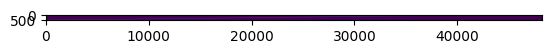

In [3351]:
plt.imshow(nice_out[0].T[::-1], vmin=0, vmax=1)

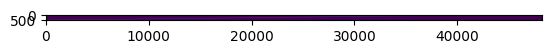

In [3290]:
plt.imshow(nice_out[0].T[::-1], vmin=0, vmax=1)

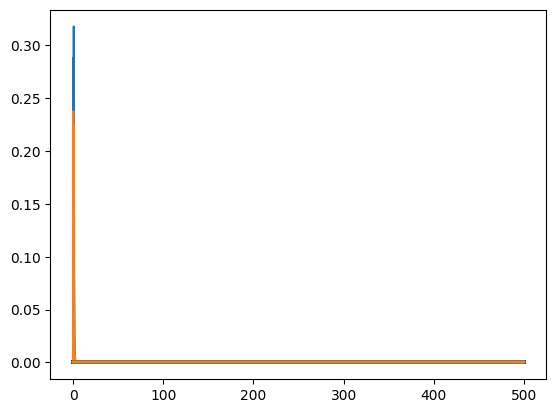

In [3282]:
_=plt.plot(ret.t, nice_out[1])

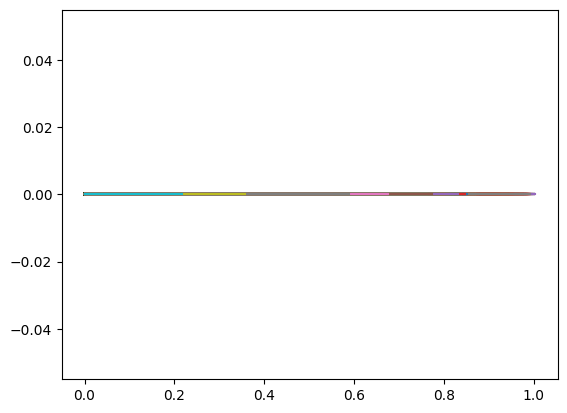

In [3273]:
_ = plt.plot(nice_out[0], nice_out[1])

In [2316]:
_ = plt.plot(np.concatenate(ret.u[:-1], axis=1).T, np.concatenate(ret.v[:-1], axis=1).T)

AttributeError: u

In [1545]:
def test_derv(t, inp):
    return tuple(-0.5 * i for i in inp)

In [154]:
test = RK4(test_derv)

In [155]:
out = test((2,4), (0,10))

In [49]:
np.arange(*(0,10), 0.4)

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
       5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. , 8.4, 8.8, 9.2, 9.6])